## Data Analysis

### Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.api as sm

### Reading data & parse it

In [5]:
df = pd.read_csv("Final_Dataset.txt", parse_dates=["date_"])
df.head()

,Unnamed: 0,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


### Drop unnecessary columns

In [6]:
# Drop the additonal index 
df.drop("Unnamed: 0", axis=1, inplace=True)

# Get the top 5 rows of data
df.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


### How much memory does this dataset would take?

In [7]:
# inspect how much memory does it take ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598607 entries, 0 to 3598606
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date_             datetime64[ns]
 1   user_id_maped     int64         
 2   program_name      object        
 3   duration_seconds  int64         
 4   program_class     object        
 5   season            int64         
 6   episode           int64         
 7   program_desc      object        
 8   program_genre     object        
 9   series_title      int64         
 10  hd                int64         
 11  original_name     object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 329.5+ MB


We can see here couple of things :
- Memory usage are HUGE.
- No. Of Rows : 3598607
- Columns Data Types:
    - 1 of datetime obj
    - 6 int numbers
    - 5 objects (strings)

We need to optimze this as much as possible!

One way to drop columns that have no significant meaning or convert the dtype to something more efficient.
- like objects ==> category

### Inspect for NaNs

In [8]:
# Check NaNs for the entire DataFrame
df.isna().sum()

date_                   0
user_id_maped           0
program_name            0
duration_seconds        0
program_class           0
season                  0
episode                 0
program_desc        43965
program_genre           0
series_title            0
hd                      0
original_name           0
dtype: int64

In [9]:
# Check if there's NaNs value 
print(df["program_class"].unique(), "\n")

# inspect the Genres we have
print(df["program_genre"].unique(), "\n")

# Check No. Of Unique original names 
df["original_name"].nunique()

['MOVIE' 'SERIES/EPISODES'] 

['Drama' 'Animation' 'Biography' 'Action' 'Comedy' 'Horror'
 'NOT_DEFINED_IN_UMS' 'Thriller' 'Documentary' 'Crime' 'Family' 'Romance'
 'Sci-Fi' 'Adventure' 'SERIES_NOT_ADDED_UNDER_ANY_GENRE' 'Wrestling'] 



1828

We need to check for NaNs because the .astype() will error out if one value in this column have Nulls.

And .unique() is the perfect for inspecting this case because if there's a null it'll show in the array above. Unlike .nunique() Method which doesn't count up the NaNs

### Time to optimize the DataFrame a little bit

In [10]:
# Converting to category to optimize the DataFrame memory allocation 
df["program_class"] = df["program_class"].astype("category")
df["program_genre"] = df["program_genre"].astype("category")
df["original_name"] = df["original_name"].astype("category")

In [11]:
# Check for DF memory allocation after small optimization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598607 entries, 0 to 3598606
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date_             datetime64[ns]
 1   user_id_maped     int64         
 2   program_name      object        
 3   duration_seconds  int64         
 4   program_class     category      
 5   season            int64         
 6   episode           int64         
 7   program_desc      object        
 8   program_genre     category      
 9   series_title      int64         
 10  hd                int64         
 11  original_name     category      
dtypes: category(3), datetime64[ns](1), int64(6), object(2)
memory usage: 260.9+ MB


Nice! we can see here we optimized the Dataframe By = ~20%

That's a good amount for a DataFrame of 3M rows!

Lets see what're the genres in this one "SERIES_NOT_ADDED_UNDER_ANY_GENRE" AND "NOT_DEFINED_IN_UMS" and see maybe we can interpret something ?

### Inspect an unknown genre

In [12]:
# inspect the "SERIES_NOT_ADDED_UNDER_ANY_GENRE" Genre
mask = df["program_genre"] == "SERIES_NOT_ADDED_UNDER_ANY_GENRE"
df[mask].head(3)

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
5787,2017-11-12,7235,Harry Ep1,9,SERIES/EPISODES,1,1,NaN,SERIES_NOT_ADDED_UNDER_ANY_GENRE,0,0,Harry
16061,2017-11-24,26687,Friends The One Where Emma Cries,1335,SERIES/EPISODES,9,2,Comedy MovieThe One Where Emma Cries (HD),SERIES_NOT_ADDED_UNDER_ANY_GENRE,0,0,Friends
19335,2018-01-27,19450,Friends The One Where Emma Cries,1332,SERIES/EPISODES,9,2,Comedy MovieThe One Where Emma Cries (HD),SERIES_NOT_ADDED_UNDER_ANY_GENRE,0,0,Friends


In [13]:
# Number of Series/Episode that doesn't belong to "SERIES_NOT_ADDED_UNDER_ANY_GENRE"
df[~mask]["program_class"].value_counts()

SERIES/EPISODES    2052817
MOVIE              1544952
Name: program_class, dtype: int64

In [14]:
# Number of Series/Episode that belong to "SERIES_NOT_ADDED_UNDER_ANY_GENRE"
df[mask]["program_class"].value_counts()

SERIES/EPISODES    838
MOVIE                0
Name: program_class, dtype: int64

In [15]:
def get_percentage(numerator, denominator):
    """
    Get the percentage of two numbers.

    Args:
    numerator: Accepts a number whether (int, float, etc..).
    denominator: Accept a number which is not a zero.

    Returns:
    Percentage in string format
    """
    if denominator <= 0:
        raise Exception("Please the number is ZERO in denominator, We can't divide by zero!")
    return f"{(numerator / denominator) * 100:.2f}%"

In [16]:
get_percentage(df[mask]["program_class"].value_counts()[0], df[~mask]["program_class"].value_counts()[0])

'0.04%'

In [17]:
# Free up memory
del mask

In [18]:
# Check The "NOT_DEFINED_IN_UMS" Genre
mask2 = df["program_genre"] == "NOT_DEFINED_IN_UMS"
df[mask2].head(3)

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
60,2018-01-02,21795,Dunkirk,6433,MOVIE,0,0,NaN,NOT_DEFINED_IN_UMS,0,1,Dunkirk
242,2018-01-07,2711,Dunkirk,75,MOVIE,0,0,NaN,NOT_DEFINED_IN_UMS,0,1,Dunkirk
244,2018-04-14,22430,Dunkirk,15,MOVIE,0,0,NaN,NOT_DEFINED_IN_UMS,0,1,Dunkirk


In [19]:
# Check how many in movie or series this genre have "NOT_DEFINED_IN_UMS"
df[mask2]["program_class"].value_counts()

MOVIE              11775
SERIES/EPISODES        0
Name: program_class, dtype: int64

In [20]:
# Number of Movie that doesn't belong to "NOT_DEFINED_IN_UMS"
df[~mask2]["program_class"].value_counts()

SERIES/EPISODES    2053655
MOVIE              1533177
Name: program_class, dtype: int64

In [21]:
# Check how many movies or series/episodes belong to this Genre
df[mask2]["program_name"].value_counts()

Dunkirk                                             11436
Dunkirk                                               336
Batman Unlimited: Animal Instincts (for Viewing)        3
Name: program_name, dtype: int64

In [22]:
# Get the percentage of movie that only belong to this Genre "NOT_DEFINED_IN_UMS"
get_percentage(df[mask2]["program_class"].value_counts().loc["MOVIE"], df[~mask2]["program_class"].value_counts().loc["MOVIE"])

'0.77%'

Keypoints for "SERIES_NOT_ADDED_UNDER_ANY_GENRE" Genre:

- It seems for the genre — "SERIES_NOT_ADDED_UNDER_ANY_GENRE" due to some reason Jawwy TV interpret some Series/Episodes as "SERIES_NOT_ADDED_UNDER_ANY_GENRE".
- ONLY from the program_class of Series/Episodes.
- Sums up to 838 Series/Episodes only.
- Only 4% of the WHOLE Series/Episodes have the genre of "SERIES_NOT_ADDED_UNDER_ANY_GENRE"


Keypoints for "NOT_DEFINED_IN_UMS" Genre:
- Like the above Jawway TV interpreted the 2 movies which are[Dunkirk, Batman Unlimited: Animal Instincts] as this genre.
- ONLY from the program_class of "MOVIE" belong to this genre.
- Sums up to 11775 Movies.
- The Percentage of those movies belong to this genre to the whole are 77%.

### Data Manipulation for column values

In [23]:
# We need to map those Genres to just "Others"
df["program_genre"] = df["program_genre"].str.replace("SERIES_NOT_ADDED_UNDER_ANY_GENRE", "Others")
df["program_genre"] = df["program_genre"].str.replace("NOT_DEFINED_IN_UMS", "Others")

# Capitalize the first Letter of the word in program_class & Change values for visualization later
df["program_class"] = df["program_class"].str.replace("MOVIE", "Movie")
df["program_class"] = df["program_class"].str.replace("SERIES/EPISODES", "TV Show")

# Change the dtype to category since we have small number of unique values
df["program_genre"] = df["program_genre"].astype("category")
df["program_genre"].value_counts()

Animation      1524643
Action          542541
Drama           492508
Comedy          448535
Horror          226644
Thriller        133952
Family          102143
Documentary      50917
Biography        47421
Others           12613
Crime             9846
Sci-Fi            4610
Romance           1433
Adventure          744
Wrestling           57
Name: program_genre, dtype: int64

Since those genres doesn't mean anything important since it's unknown at this moment so we converted them to "others".

Now for columns we need to change a little bit like date_, user_id_maped etc..

In [24]:
df.head(1)

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,Movie,0,0,Drama Movie100 Streets,Drama,0,0,100 treets


#### Change some column names to better ones IMHO

In [25]:
# Rename the columns to new ones
df.rename(columns={"date_": "date",
                   "user_id_maped": "user_id",
                   "program_class": "program_type"}, inplace=True)
df.head(1)

,date,user_id,program_name,duration_seconds,program_type,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,Movie,0,0,Drama Movie100 Streets,Drama,0,0,100 treets


#### Get insight from unkown columns

Lets inspect some the columns such as: hd, season, episode, series_title, duration_seconds. basically the quantitatives.

In [26]:
# Check for hd values 
df["hd"].value_counts()

0    2294255
1    1304352
Name: hd, dtype: int64

In [27]:
# Percentage of hd movies + tv shows
print(f'{df["hd"].value_counts()[0] / df["hd"].value_counts().sum() * 100:.2f}%')

63.75%


In [28]:
# Percentage of sd movies + tv shows
print(f'{df["hd"].value_counts()[1] / df["hd"].value_counts().sum() * 100:.2f}%')

36.25%


In [29]:
# Check the series title values
df["series_title"].value_counts()

0    3555946
1      42661
Name: series_title, dtype: int64

In [30]:
# Inspect rows with series_title = 1
df[(df["series_title"] == 1)].iloc[:15]

,date,user_id,program_name,duration_seconds,program_type,season,episode,program_desc,program_genre,series_title,hd,original_name
96,2018-01-11,26302,Kung Fu Panda: Legends Of Awesomeness,48,TV Show,1,0,Animation MovieKung Fu Panda: Legends Of Aweso...,Animation,1,1,Kung Fu Panda: Legends Of Awesomeness
98,2017-10-10,3218,Melissa & Joey,10,TV Show,1,0,"Comedy MovieMelissa & Joey, S01",Comedy,1,1,Melissa & Joey
268,2017-04-17,8808,Vikings (T),51,TV Show,3,0,"Action MovieVikings, S03 (HD)",Action,1,1,Vikings (T)
345,2017-10-25,14600,Power,3,TV Show,4,0,"Drama MoviePower, S05",Drama,1,1,Power
570,2018-01-11,26302,Kung Fu Panda: Legends Of Awesomeness,10,TV Show,1,0,Animation MovieKung Fu Panda: Legends Of Aweso...,Animation,1,1,Kung Fu Panda: Legends Of Awesomeness
714,2017-08-06,18554,The Walking Dead,15,TV Show,5,0,"Horror MovieThe Walking Dead, S05 (HD)",Horror,1,1,The Walking Dead
961,2017-04-06,11660,The Walking Dead,99,TV Show,1,0,"Horror MovieThe Walking Dead, S01 (HD)",Horror,1,1,The Walking Dead
1044,2017-06-06,4808,Caramel (T),29,TV Show,1,0,"Drama MovieCaramel, S01 (HD)",Drama,1,1,Caramel (T)
1051,2018-01-11,26302,The Penguins of Madagascar,11,TV Show,1,0,"Animation MovieThe Penguins of Madagascar, S02",Animation,1,1,The Penguins of Madagascar
1253,2018-01-10,30750,Six,95,TV Show,1,0,"Action MovieSix, S02",Action,1,1,Six


In [31]:
# Check series_title = 1 is it distributed in program_type
df[df["series_title"] == 1]["program_type"].value_counts()

TV Show    42661
Name: program_type, dtype: int64

Only Tv show for series_title = 1

Lets hypothetically say this indicates one title in "program_name".

In [32]:
# Inspect rows with series_title = 0
df[(df["series_title"] == 0) & (df["program_type"] == "TV Show")].iloc[:15]

,date,user_id,program_name,duration_seconds,program_type,season,episode,program_desc,program_genre,series_title,hd,original_name
22,2017-12-03,19694,Hell On Wheels The White pirit,2650,TV Show,2,7,Drama MovieThe White Spirit (HD),Drama,0,0,Hell On Wheels
52,2017-12-17,730,PAW Patrol Pups And The Ghost Pirate,1388,TV Show,1,10,Animation MoviePups And The Ghost Pirate (HD),Animation,0,0,PAW Patrol
68,2017-10-31,5094,Zoo Ten Years Gone,2403,TV Show,3,3,Action MovieTen Years Gone (HD),Action,0,0,Zoo
71,2017-03-14,5542,Littlest Pet hop (T) Lotsa Luck,688,TV Show,1,22,Animation MovieLotsa Luck,Animation,0,1,Littlest Pet hop (T)
72,2017-12-04,18960,Dora the Explorer Dora's Fantastic Gymnastics...,1379,TV Show,7,5,Animation MovieDora's Fantastic Gymnastics Adv...,Animation,0,0,Dora the Explorer
75,2017-03-14,20081,Hannibal orbet,26,TV Show,1,7,Thriller MovieSorbet,Thriller,0,0,Hannibal
76,2017-05-24,19143,The Walking Dead Tell It To The Frogs,4943,TV Show,1,3,Horror MovieTell It To The Frogs (HD),Horror,0,0,The Walking Dead
78,2018-01-19,17431,I urvived… Amy/Trish & Darrell,1251,TV Show,6,10,Documentary MovieAmy/Trish & Darrell (HD),Documentary,0,0,I urvived…
82,2017-12-26,30849,Wannous Ep20,398,TV Show,1,20,"Drama MovieWannous, S01, Ep20 (HD)",Drama,0,0,Wannous
84,2017-12-30,30319,Littlest Pet hop The Tortoise And The Heir,6,TV Show,4,1,Animation MovieThe Tortoise And The Heir (HD),Animation,0,0,Littlest Pet hop


In [33]:
# Inspect rows with series_title = 0
df[df["series_title"] == 0]["program_type"].value_counts()

TV Show    2010994
Movie      1544952
Name: program_type, dtype: int64

Have both movie / tv show for series_title = 0

Lets hypothetically say this indicates two titles for "program_name".

In [34]:
# Extract data from certain index position for series_title = 1
df.iloc[1544]

date                           2018-03-05 00:00:00
user_id                                      18613
program_name                         PAW Patrol   
duration_seconds                                16
program_type                               TV Show
season                                           1
episode                                          0
program_desc        Animation MoviePAW Patrol, S02
program_genre                            Animation
series_title                                     1
hd                                               1
original_name                         PAW Patrol  
Name: 1544, dtype: object

In [35]:
# Extract data from certain index position for series_title = 0
df.iloc[8]

date                    2018-01-27 00:00:00
user_id                               11660
program_name                        Kidnap 
duration_seconds                         85
program_type                          Movie
season                                    0
episode                                   0
program_desc        Action MovieKidnap (HD)
program_genre                        Action
series_title                              0
hd                                        1
original_name                        Kidnap
Name: 8, dtype: object

In conclusion, at first I thought because it has two titles in "program_name" but it's not. especially for movie type.

In [36]:
# Check the season values
df["season"].value_counts()

0     1545134
1     1181752
2      202347
3      167121
7      136912
4      117600
5       91525
6       86777
8       39223
9       14176
10       9120
12       2758
11        935
21        607
22        591
18        439
23        423
19        385
20        372
13        324
15         59
14         27
Name: season, dtype: int64

In [37]:
# Check season is it applicaple for Movie ?
df[(df["season"] > 0) & (df["program_type"] == "Movie")]

,date,user_id,program_name,duration_seconds,program_type,season,episode,program_desc,program_genre,series_title,hd,original_name


In [38]:
# Check season is it applicaple for TV Show ?
len(df[(df["season"] > 0) & (df["program_type"] == "TV Show")])

2053473

In [39]:
# Inspect the episode values and total
df["episode"].value_counts(), len(df["episode"])

(0      1587681
 1       226398
 2       128271
 3       112682
 4       105430
         ...   
 269         31
 272         30
 266         29
 273         29
 116          4
 Name: episode, Length: 281, dtype: int64, 3598607)

In [40]:
# Get the maximum number of episode & minimum
df["episode"].max(), df["episode"].min()

(282, 0)

In [41]:
# Mean of the episode column
print(f"Average episode is: {df['episode'].mean()}")

Average episode is: 7.0286021785652055


In [42]:
# Get the median to see if there's a HUGE outlier
print(f"The median of episodes: {df['episode'].median()}")

The median of episodes: 1.0


In [43]:
# Inspect the duration_seconds column & total
df["duration_seconds"].value_counts(), len(df["duration_seconds"])

(90       48069
 6        45613
 2        41899
 4        41615
 5        40773
          ...  
 26291        1
 22362        1
 53428        1
 36408        1
 31116        1
 Name: duration_seconds, Length: 33668, dtype: int64, 3598607)

In [44]:
# Mean of duration_seconds column 
print(f"Average duration_seconds: {df['duration_seconds'].mean()}")

Average duration_seconds: 1177.635590382612


In [45]:
# Max of duration_seconds column 
print(f"The maximum duration_seconds: {df['duration_seconds'].max()}")

The maximum duration_seconds: 2053603


In [46]:
# Filter out the maximum of duration_seconds for a user
df[df["duration_seconds"] == 2053603]

,date,user_id,program_name,duration_seconds,program_type,season,episode,program_desc,program_genre,series_title,hd,original_name
1800670,2017-12-25,30881,War for the Planet of the Apes,2053603,Movie,0,0,Action MovieWar for the Planet of the Apes (HD),Action,0,1,War for the Planet of the Apes


In [47]:
# Inspect some of the movies this user who holds the record of the most watching duration in movies type.
df[(df["user_id"] == 30881) & (df["program_name"] == "Emoji Movie")]

,date,user_id,program_name,duration_seconds,program_type,season,episode,program_desc,program_genre,series_title,hd,original_name
1806277,2017-11-17,30881,Emoji Movie,88,Movie,0,0,Animation MovieEmoji Movie,Animation,0,0,Emoji Movie
1806707,2017-11-17,30881,Emoji Movie,4738,Movie,0,0,Animation MovieEmoji Movie,Animation,0,0,Emoji Movie


In [48]:
# Inspect with two records of the same user_id & movie
df.iloc[1806707], df.iloc[1806277]

(date                       2017-11-17 00:00:00
 user_id                                  30881
 program_name                       Emoji Movie
 duration_seconds                          4738
 program_type                             Movie
 season                                       0
 episode                                      0
 program_desc        Animation MovieEmoji Movie
 program_genre                        Animation
 series_title                                 0
 hd                                           0
 original_name                      Emoji Movie
 Name: 1806707, dtype: object, date                       2017-11-17 00:00:00
 user_id                                  30881
 program_name                       Emoji Movie
 duration_seconds                            88
 program_type                             Movie
 season                                       0
 episode                                      0
 program_desc        Animation MovieEmoji Movie
 program_g

It's the same maybe if we have the timestamp we will get to know more insights on this.. since the 00:00:00 at midnight is a pandas default.

Keypoints for quantitaive [hd, season, episode, series_title, duration_seconds]:
- For hd:
    - hd feature only have 1 which indicates the movie / tv show have hd resolution otherwise 0 it doesn't have one.
    - hd for higher / lower resolution the percentages goes like: 36% / 63% respectively.
    - There's no indicators for 4k, FHD and so on ... maybe it's the old version of Jawwy tv. or that's how they're referenced in the dataset for 4k it gives it 1 other than 4k it goes by 0.


- For season:
    - Only applicaple for Movies, For TV Shows there's no season obviously but just wanna make sure. Because some sites call it "sequel" instead of season.
    - Nearly ~2 Million Movie that have more than one season.

- For episode:
    - The range of episodes between 0 — 282. whether it's a movie or one episode of a TV Show.
    - The Average episodes that the users had been watched is ~7 episodes. But that's not the case if there's an outlier.
    - The median for this feature is 1. that means there's an outlier it seems normal because not everyone watches only a single movie. Some people maybe binge watching some TV Shows out there. Another possibility is people who falls asleep during watch along parties and such a thing could be a disastrous for database records. Why is that ? because the feature of "auto play" to next episode or recommendation to another and the user is sleeping that will keep the system to auto record every single activity as long as the user are sleeping....ZzZ.
    - Most popular number for episode the user watches are 0. Which means he either watches a movie or one episode of a TV Show.

- For series_title:
     - for series_title = 1, Only TV Show have this value And for series_title = 0 have both TV Show & Movie. So i put a hypothesis maybe it's an indicator for "ONE" title and "TWO" title respectivly. But after inspecting more I was proved wrong because there's some rows in series_title of 0 have only ONE title. So the format that i imagined inside my head are like this (Original Movie/epsiode title + the episode name).

- For duration_seconds:
    - It seems like the number of seconds someone watching the episode of a movie or TV show.
    - What's interesting is the duration of seconds some users have like = 2053603 Seconds which equals to ~570 Hours🔴which are a lot of time for watching a movie. But it seems to have some feature for cumulative recording mechanism because there's no movie with 570 hours long.
    - For cumulative part I inspected some other movies of this user(30881) and i found that movie named "Emoji Movie" which have 2 reconds at the same day even though the time is unknown because Jawwy doesn't record in their. But that's interesting how they separate those records ? is it by some specific duration ? or by logging out / log in again ?.
    - Another possibility of those huge durations of time the same as "Auto play" for next episode but this like a loop for the same episode.



#### Drop duplicates

In [49]:
# Check for duplicates in the entire DataFrame
mask_duplicates = df.duplicated()
df[mask_duplicates]

,date,user_id,program_name,duration_seconds,program_type,season,episode,program_desc,program_genre,series_title,hd,original_name
515,2017-08-01,1933,Lego cooby-Doo! Blowout Beach Bash,81,Movie,0,0,Animation MovieLego Scooby-Doo! Blowout Beach ...,Animation,0,1,Lego cooby-Doo! Blowout Beach Bash
617,2017-09-16,25017,The Boss Baby,90,Movie,0,0,Animation MovieThe Boss Baby (HD),Animation,0,1,The Boss Baby
671,2018-01-27,29953,Madagascar: Escape Africa,135,Movie,0,0,Animation MovieMadagascar: Escape 2 Africa,Animation,0,0,Madagascar: Escape Africa
724,2018-03-03,3180,The Adventures of Petey and Friends,64,Movie,0,0,Animation MovieThe Adventures of Petey and Fri...,Animation,0,1,The Adventures of Petey and Friends
1002,2018-04-24,3094,Ferdinand,92,Movie,0,0,Animation MovieFerdinand (HD),Animation,0,1,Ferdinand
...,...,...,...,...,...,...,...,...,...,...,...,...
3598426,2018-03-13,8715,Dora The Explorer Kittens In Mittens,1380,TV Show,8,7,Animation MovieKittens In Mittens (HD),Animation,0,0,Dora The Explorer
3598453,2018-01-29,8715,Blaze And The Monster Machines The Driving Fo...,1305,TV Show,1,3,Animation MovieThe Driving Force (HD),Animation,0,0,Blaze And The Monster Machines
3598485,2018-01-24,8715,Blaze And The Monster Machines Truck Rangers,1318,TV Show,1,15,Animation MovieTruck Rangers (HD),Animation,0,0,Blaze And The Monster Machines
3598598,2017-09-14,10486,The Boss Baby,90,Movie,0,0,Animation MovieThe Boss Baby (HD),Animation,0,1,The Boss Baby


We can see the bottom 2 rows that's a duplicate right there. Also seems like there's a lot of duplicates 300K is not a small number even though the entire rows sums up to ~3M.

Lets see the percentage of the duplicates to the WHOLE dataset.

In [50]:
# Get the Number of duplicates & Percentage to the whole DataFrame
print(f"Number of Duplicates: {mask_duplicates.sum():_}")
print(f"Percentage of duplicates to the whole DF: {get_percentage(mask_duplicates.sum(), len(df))}")

Number of Duplicates: 397_883
Percentage of duplicates to the whole DF: 11.06%


In [51]:
# Free up memory since we don't need the mask anymore
del mask_duplicates

Data Attributes Information:

Name — Data Type(Pandas) — Data Type(Statistic term) — Description
- date — datetime object — Quantitative — Values 2017-03-14 / 2018-04-30 indicates users activity in Jawwy TV database.
- user_id — integer object — Quantitative — contains of user_id not unique the user may get duplicated (E.g. user 1 may get 20 movie watching).
- program_name — pandas object — Qualitative — The movie or TV Show name episode.
- duration_seconds — integer object — Quantitative — Duration of a single user watching Movies/TV shows.
- program_type — pandas object — Quantitative — Whether a user watched a Movie or TV Show.
- season — integer object — Quantitative — indicates a user watched one season(0) indexed in DataFrame. Or 1 and more.
- episode — integer object — Quantitative — Indicates a user how many episodes he/she watched.
- program_desc — pandas object — Qualitative — A small description for a Movie/TV Show.
- program_genre — pandas category object — Qualitative — Types of genre of the Movie / TV Show. whether it's Drama, Sci-Fi, etc..
- series_title — integer object — Quantitative — A binary indicator of 0, 1. it's UNKNOWN for me untill now what those mean.
- hd — integer object — Quantitative — A binary indicator for resolution whether 1 HD or 0 SD resolution.
- original_name — pandas category —  Qualitative — Name of the Movie / TV Show. Unlike "program_name" which may contain the episode name and NOT the *original* series name.

Ok that's enough of data analysis and manipulation for now!

## Exploratory Data Analysis & Statistical Hypothesis Testing


### Statistical analysis

#### Standard Deviation
Measures the variation or dispersion of a set of values.

In simple words, High values mean higher variability.
- Bigger than the mean(average) ==> Higher variation.


In [53]:
# Check the Standard deviation
print(df["duration_seconds"].mean())
df["duration_seconds"].std()

1177.635590382612


6231.966899676256

We can see here that the values dispersed, Which means there are users who watches a lot of movies / TV Shows. (Probably Binge watching)

#### Confidence interval
A range that gives a sense of how precisely a statistic estimates a parameter.

In simple words, It'll give you a notion of how much the parameter or coefficient vary. 

---
Lets test couple of things:
- season.
- episodes.

In [54]:
# Confidence interval of the season mean
print(df[["season"]].mean())
st.norm.interval(alpha=0.95,
                 loc=df["season"].mean(),
                 scale=st.sem(df["season"]))

season    1.426785
dtype: float64


(1.4245705358900655, 1.4289997483893793)

We can see that the lower bound + upper bound of season mean with a Confidence interval of 95%.

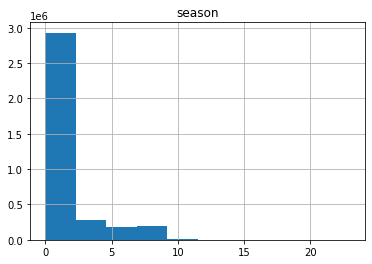

In [55]:
# Histogram of the season mean
df[["season"]].hist();

In [56]:
# Confidence interval of the episode mean
print(df[["episode"]].mean())
st.norm.interval(alpha=0.95,
                 loc=df["episode"].mean(),
                 scale=st.sem(df["episode"]))

episode    7.028602
dtype: float64


(7.01470446475272, 7.042499892377691)

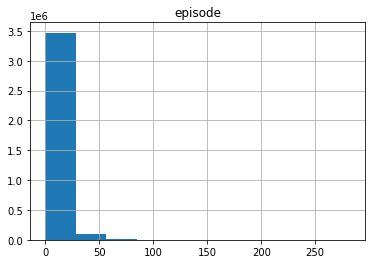

In [57]:
# Histogram of the episode mean
df[["episode"]].hist();

#### T-test
It helps us understand whether one group is "Statistically" different from the other.


Note: Common value for significance level is 5% or α=0.05.
And I'll be using it through out this entire section.


###### Hypothesis
There are two types of hypothesis:
- Null Hypothesis: Is a hypothesis which the researchers tries nullify or reject. OR in another definition, the two variables we use are "independent"
- Alternative Hypothesis: Is a hypothesis the researchers tries to prove. OR in another definition, the two variables we use are "dependent"


So we're gonna test:
- H0: Both Movie / TV Show watchers have same time duration of watching.
- H1: movie watcher and TV show watchers are NOT the same in time watching.


In [58]:
# Set the ALPHA value (p-value threshold)
ALPHA = 0.05

In [59]:
# Subset: People who watch Movies, TV Show and get the duration for each user.
movie_only_users = df.loc[df["program_type"] == "Movie"].duration_seconds
tvshow_only_users = df.loc[df["program_type"] == "TV Show"].duration_seconds

In [60]:
# Compute the T-test
stats, p_t = st.ttest_ind(a=movie_only_users.sample(frac=0.05), b=tvshow_only_users.sample(frac=0.05))
print(f"The p-value for T-test: {p_t}")

if p_t >= ALPHA:
    print("Both Movie / TV Show watchers have same time duration of watching (Failed to reject H0)")
else:
    print("Movie watcher and TV show watcher are NOT the same in time watching (Reject H0)")

The p-value for T-test: 1.0544447755583053e-169
Movie watcher and TV show watcher are NOT the same in time watching (Reject H0)


#### Chi-square test
Determine whether there's a statistically significant difference between the expected frequencies and the observed frequencies.

Lets make a hypothesis about Movie / TV Show preference in resolution:
- H0: there is no relationship between Movie/TV Show watchers and HD preference.
- H1: There is a Strong relationship between Movie/TV Show watchers and HD preference.

In [61]:
# Create the cross tab object
tab_movtv = pd.crosstab(index=df["program_type"].sample(frac=0.02),
                        columns=df["hd"].sample(frac=0.02))
tab_movtv

hd,0,1
program_type,,
Movie,209,427
TV Show,750,117


In [62]:
# Compute the Chi-square test
chi2, p_c, _, _ = st.chi2_contingency(tab_movtv)
print(f"The p-value for Chi-square test: {p_c}")

if p_c >= ALPHA:
    print("There is no relationship between Movie/TV Show watchers and HD preference (Failed to reject H0)")
else:
    print("There is a Strong relationship between Movie/TV Show watchers and HD preference (Reject H0)")

The p-value for Chi-square test: 6.431612333668485e-101
There is a Strong relationship between Movie/TV Show watchers and HD preference (Reject H0)


Awesome!, those tests we're good enough right now.

We need to do Data Visualization so we can get a good look at the users and data we have!.

### Exploratory Data Analysis

In [154]:
# Set the color pallate
plt.style.use("tableau-colorblind10")

#### Percentage of HD Vs. SD

In [63]:
res_subset = df[["user_id", "hd"]].drop_duplicates(keep="first")
res_subset.head(2)

,user_id,hd
0,26138,0
1,7946,1


In [64]:
res_subset["hd"] = np.where(res_subset["hd"] == 0, "SD", "HD")
res_subset.head(2)

,user_id,hd
0,26138,SD
1,7946,HD


It looks like np.where() is better than .apply() for this use case scenraio as:
https://stackoverflow.com/questions/44991438/lambda-including-if-elif-else


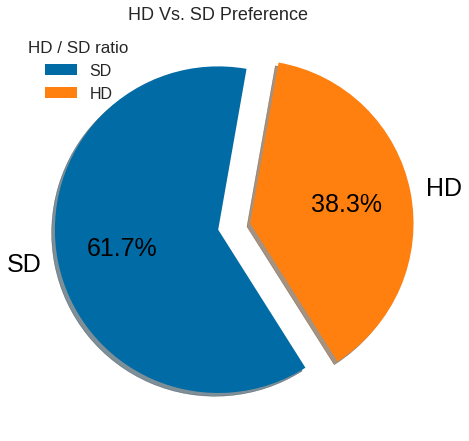

In [174]:
# plt.style.use("seaborn-colorblind")
fig, ax = plt.subplots(figsize=(12, 7))
ax.pie(res_subset["hd"].value_counts(),
                    autopct='%1.1f%%',
                    explode=(0, 0.2),
                    textprops={'size': 25, 'color': 'black'},
                    startangle=80,
                    labels=["SD", "HD"],
                    shadow=True)
ax.set_title("HD Vs. SD Preference",
             fontsize = 18)
ax.legend(fancybox=True,
          fontsize=16,
          title="HD / SD ratio",
          title_fontsize=17)
plt.show()
fig.savefig('HD_SD.png')

#### Most popular Genres in movie & TV Show types

In [66]:
movie_type = df[df["program_type"] == "Movie"][["program_type", "program_genre"]]
tvshow_type = df[df["program_type"] == "TV Show"][["program_type", "program_genre"]]

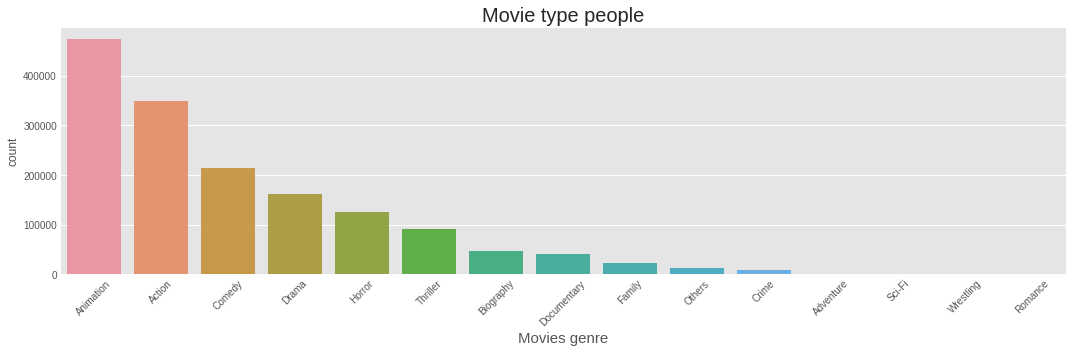

In [177]:
fig = plt.figure(1, (15, 5))

ax1 = plt.subplot(1, 1, 1)
sns.countplot(movie_type['program_genre'], order=movie_type['program_genre'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel("Movies genre", fontsize=15)
ax1.set_title("Movie type people", fontsize=20)
plt.tight_layout()
plt.show();
fig.savefig('movie_type_people.png')

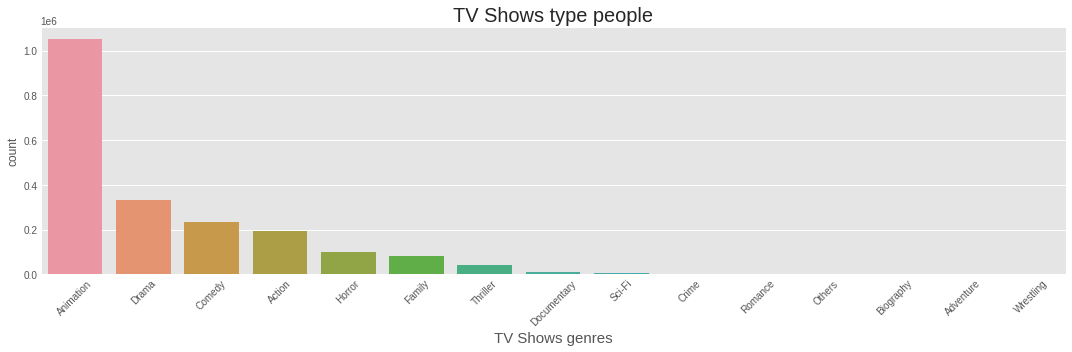

In [178]:
fig2 = plt.figure(1, (15, 5))

ax2 = plt.subplot(1, 1, 1)
sns.countplot(tvshow_type['program_genre'], order=tvshow_type['program_genre'].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_xlabel("TV Shows genres", fontsize=15)
ax2.set_title("TV Shows type people", fontsize=20)
plt.tight_layout()
plt.show();
fig.savefig('tvshow_type_people.png')

Keypoints:
- Both Movies & TV Shows people leaning towards "Animation" genre.
- For TV Shows people Favours drama in 2nd place. Unlike Movies which Action is the 2nd.
- The Ratio of SD Movies / TV Shows are more than HD resolution.


#### Most watched Movie and TV Show

In [69]:
# Create a subset for top movies
top_10_movies = df[df["program_type"] == "Movie"][["user_id", "original_name"]].groupby("original_name")["user_id"] \
            .count().reset_index(name='movie_count') \
            .sort_values(by="movie_count", ascending=False) \
            .rename({"original_name": "movie_title"}, axis=1) \
            .set_index("movie_title") \
            .nlargest(10, columns="movie_count")
top_10_movies.head(2)

,movie_count
movie_title,
The Boss Baby,81257
The Adventures of Petey and Friends,40714


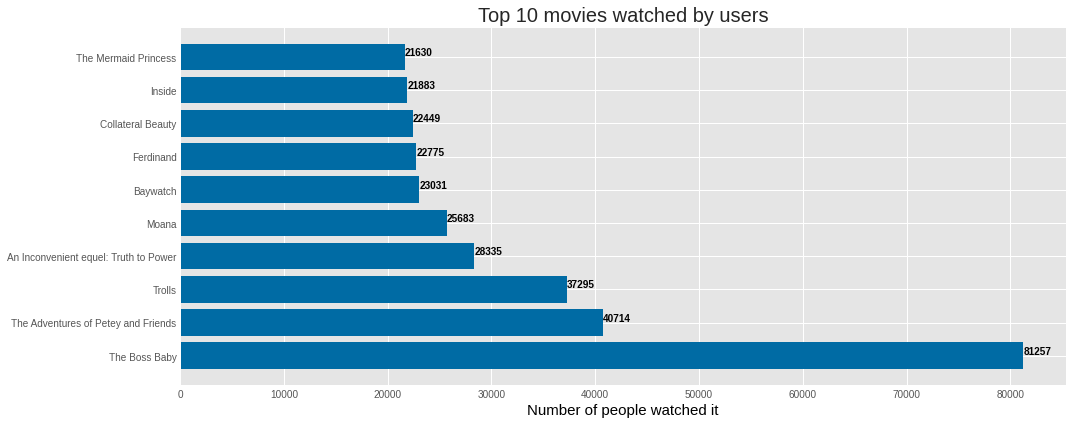

In [180]:
# Visualize the top 10 movies watched by users
fig, ax = plt.subplots(figsize=(15, 6))
ax.barh(top_10_movies.index,
        top_10_movies["movie_count"])

for i, v in enumerate(top_10_movies["movie_count"]):
    ax.text(v + 5, i + .05, str(v), color='black', fontweight='bold')

ax.set_xlabel("Number of people watched it", color="black", fontsize=15)
plt.title("Top 10 movies watched by users", fontsize = 20)
plt.tight_layout()

plt.show();
fig.savefig('top10_movies.png')

In [71]:
# Create the top 10 TV Shows watched by users
# mask1 = df["program_type"] == "Movie"
# mask2 = df["program_type"] == "TV Show"

top_10_tvshows = df[df["program_type"] == "TV Show"][["user_id", "original_name"]].groupby("original_name")["user_id"] \
            .count().reset_index(name='episodes_count') \
            .sort_values(by="episodes_count", ascending=False) \
            .rename({"original_name": "tvshow_title"}, axis=1) \
            .set_index("tvshow_title") \
            .nlargest(10, columns="episodes_count")
top_10_tvshows.head(2)

,episodes_count
tvshow_title,
PAW Patrol,118213
Friends,114168


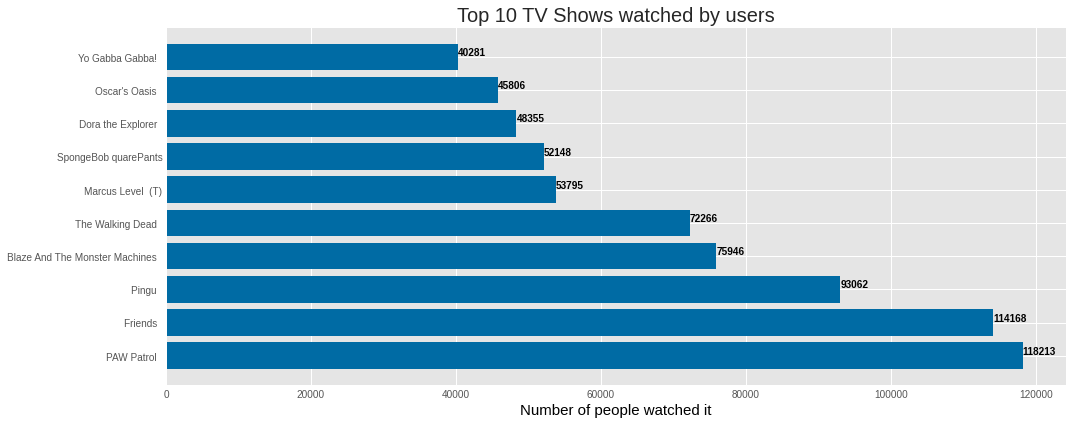

In [181]:
# Visualize the top 10 TV shows watched by users
fig3, ax3 = plt.subplots(figsize=(15, 6))
ax3.barh(top_10_tvshows.index,
        top_10_tvshows["episodes_count"])

for i, v in enumerate(top_10_tvshows["episodes_count"]):
    ax3.text(v + 5, i + .05, str(v), color='black', fontweight='bold')

ax3.set_xlabel("Number of people watched it", color="black", fontsize=15)
plt.title("Top 10 TV Shows watched by users", fontsize = 20)
plt.tight_layout()
plt.show();
fig.savefig('top10_tvshows.png')

Keypoints for users preference in genres:
- For movies: the most watched "The Boss Baby" which is an animation movie.
- For TV Shows: The most watched "PAW Patrol" which also an animation of 9 seasons untill this date.
    - In the 2nd place goes to "Friends". not far from the 1st one in popularity among Jawwy users. Unlike movies the 2nd one goes very far from 1st.


#### Insights on Weekends & Business days users activity

##### Weekends Vs. Business days

In [73]:
# Create a subset of weekend only data
weekend_users = df[["date", "user_id"]]
weekend_users["day_of_week"] = weekend_users["date"].dt.day_name()
weekend_users.drop("date", axis=1, inplace=True)
weekend_users = weekend_users[(weekend_users["day_of_week"] == "Friday") |
                              (weekend_users["day_of_week"] == "Saturday")].groupby("day_of_week").first()["user_id"]
weekend_users.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


day_of_week
Friday      15860
Saturday    26138
Name: user_id, dtype: int64

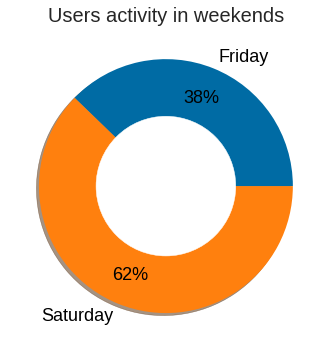

In [182]:
# Visualize the activity of users for weekends only using Circle & pie chart
fig4, ax4 = plt.subplots(figsize=(16, 5))

circle = plt.Circle((0, 0), radius=0.55, color="white")

p = plt.gcf()
p.gca().add_artist(circle)

ax4.pie(weekend_users, 
        labels=["Friday", "Saturday"],
        autopct='%1.0f%%',
        textprops={'size': 18, 'color': 'black'},
        pctdistance=0.75,
        shadow=True)
ax4.set_title("Users activity in weekends", fontsize=20)
plt.tight_layout()
plt.show();
fig4.savefig('users_act_weekend.png')

In [75]:
# Create a subset of business days
businessdays_users = df[["date", "user_id"]]
businessdays_users["day_of_week"] = businessdays_users["date"].dt.day_name()
businessdays_users.drop("date", axis=1, inplace=True)
businessdays_users = businessdays_users[~businessdays_users["day_of_week"].isin(["Friday", "Saturday"])].groupby("day_of_week")
businessdays_users.first()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id
day_of_week,
Monday,11374
Sunday,7946
Thursday,7418
Tuesday,30971
Wednesday,19307


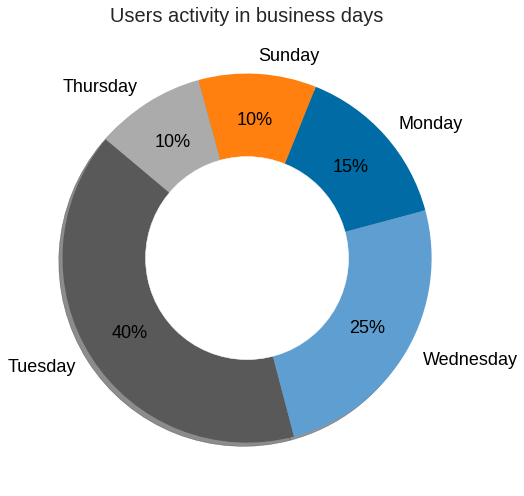

In [183]:
# Visualize the business days only using Pie & Circle graph
plt.style.use("tableau-colorblind10")
fig5, ax5 = plt.subplots(figsize=(18, 7))

circle = plt.Circle((0, 0), radius=0.55, color="white")

p = plt.gcf()
p.gca().add_artist(circle)

ax5.pie(businessdays_users.first()["user_id"], 
        labels=["Monday", "Sunday", "Thursday", "Tuesday", "Wednesday"],
        autopct='%1.0f%%',
        textprops={'size': 18, 'color': 'black'},
        pctdistance=0.75,
        startangle=15,
        shadow=True)
ax5.set_title("Users activity in business days", fontsize=20)
plt.tight_layout()
plt.show();
fig5.savefig('user_act_bus.png')

Keypoints:
- People in tend to use Jawwy TV to watch either movies or TV shows in the Saturday for the weekend.
- For business days, It seems like people prefer Tuesday the most as the day to watch movies or TV shows.
- Interesting thing is Wednesday is the 2nd famous day to watch movies/TV shows on even though from what I see the Thursday is more popular as It's nearly a weekend even though half of it but that's interesting indeed to be Wednesday the 2nd.

##### User preferences movie or TV Show to watch for each day

In [81]:
weekend_programs = df[["date", "program_type"]]
weekend_programs["day_of_week"] = weekend_programs["date"].dt.day_name()
weekend_programs.drop("date", axis=1, inplace=True)
weekend_programs.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,program_type,day_of_week
0,Movie,Saturday
1,Movie,Sunday
2,Movie,Thursday
3,Movie,Wednesday
4,Movie,Friday


In [110]:
weekend_programs.groupby("program_type")["day_of_week"].value_counts()

program_type  day_of_week
Movie         Friday         254100
              Saturday       245084
              Monday         220215
              Thursday       218129
              Tuesday        206153
              Wednesday      201871
              Sunday         199400
TV Show       Saturday       305234
              Monday         300795
              Tuesday        299876
              Wednesday      296169
              Sunday         294669
              Thursday       279850
              Friday         277062
Name: day_of_week, dtype: int64

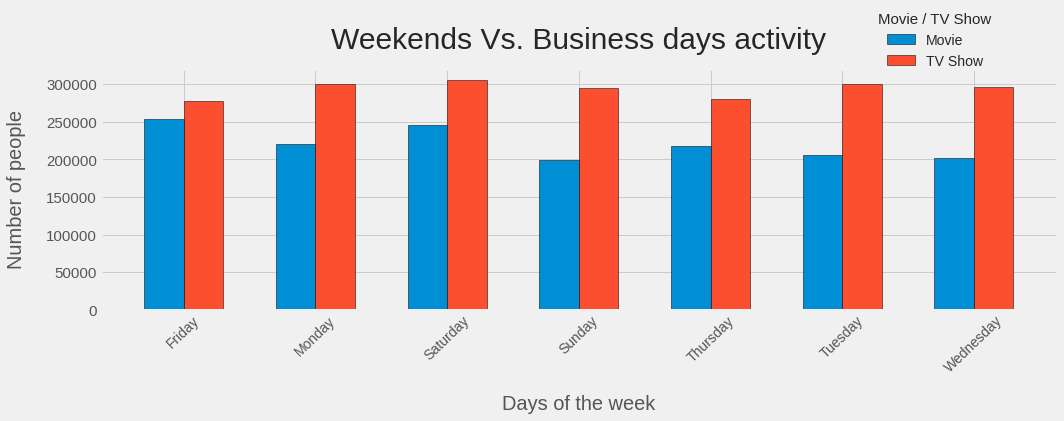

In [185]:
#use fivethirty eights style of plots
plt.style.use("fivethirtyeight")


# Create the base axis to add the bars to
fig6, ax6 = plt.subplots(1,1, figsize = (15, 6))

# Extract the labels
label = sorted(weekend_programs.groupby("program_type")["day_of_week"].value_counts()["Movie"].index)

# Create x ticks to add the data to later
x = np.arange(len(label))

# Set a width for each bar 
width = 0.3

# Create out first bar
rect1 = ax6.bar(x - width/2,
              weekend_programs.groupby("program_type")["day_of_week"].value_counts()["Movie"].sort_index(),
              width= width, 
              label="Movie",
              edgecolor="black")

# Create the second bar
rect2 = ax6.bar(x + width/2,
              weekend_programs.groupby("program_type")["day_of_week"].value_counts()["TV Show"].sort_index(),
              width=width,
              label="TV Show",
              edgecolor = "black")

# Add the labels to the axis
ax6.set_ylabel("Number of people",
             fontsize = 20,
             labelpad = 20)

ax6.set_xlabel("Days of the week",
             fontsize = 20,
             labelpad =20)

ax6.set_title("Weekends Vs. Business days activity",
            fontsize = 30,
            pad = 20)

# Set the ticks
ax6.set_xticks(x)
ax6.set_xticklabels(label)

ax6.legend(title="Movie / TV Show",
         fontsize=14,
         title_fontsize=15, 
         fancybox=True,
         bbox_to_anchor=(0.8, 0.95))

# Adjust the tick paramaters
ax6.tick_params(axis = "x",
              which = "both",
              labelrotation = 44)

ax6.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

plt.tight_layout()
fig6.savefig('weekend_bus.png')

keypoints:
- All DAYS people tend to learn more on watching TV shows more than movies.
- In Friday & Saturday which is a weekend here in Saudi Arabia the movie watching increasing more than the other days.